## Load and Visualize FashionMNIST
In this notebook, we load and look at images from the Fashion-MNIST database and then we wil create a CNN model for classification of images in FashionMNIST dataset

The first step in any classification problem is to look at the dataset you are working with.

The Pytorcht consist of FashionMNIST dataset as a built-in dataset 

In [1]:
#import necessary libraries
import torch
import torchvision
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms

In [28]:
#to convert image data to tensor
data_transform = transforms.ToTensor()

In [29]:
#downloading the dataset

train_data = FashionMNIST(root='./data', train=True,
                                   download=True, transform=data_transform)

test_data = FashionMNIST(root='./data', train=False,
                                  download=True, transform=data_transform)

In [2]:
#to load train_data
train_data = FashionMNIST(root = 'data',transform=data_transform, target_transform=None, download=False)

In [3]:
print(len(train_data))

60000


In [4]:
#divide dataset into batches
batch_size = 40
train_loader = DataLoader(train_data,batch_size = batch_size,shuffle = True)


In [5]:
#create classes of dataset
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

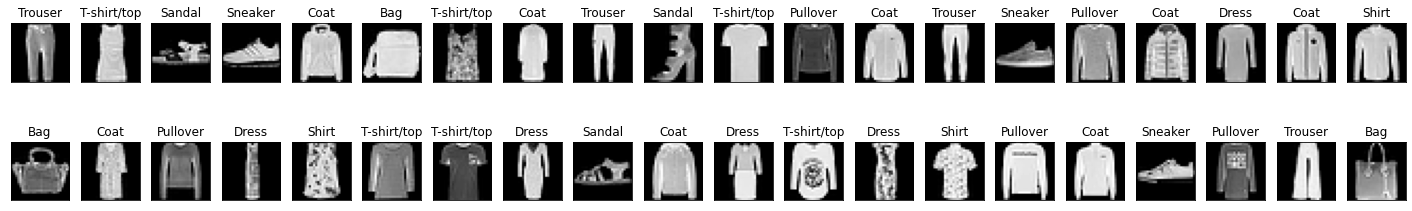

In [6]:
#visualizing the dataset
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(classes[labels[idx]])

In [7]:
#loading test data
test_data = FashionMNIST(root = 'data',train=False,
                                  download=True, transform=data_transform)

In [8]:
print(len(test_data))

10000


In [9]:
test_loader = DataLoader(test_data,batch_size = batch_size,shuffle = True)

In [10]:
#import model
from model import Net

In [11]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=18432, out_features=10, bias=True)
)


In [21]:
import torch.optim as optim
import torch.nn as nn
optimizer = optim.SGD(net.parameters(),lr = 0.0005)
criterion = nn.CrossEntropyLoss()

In [13]:
from torch.autograd import Variable

In [15]:
from torch.autograd import variable
def train(n_epoch):
    for epoch in range(n_epoch):
        running_loss = 0.0
        for batch_i,data in enumerate(train_loader):
            inputs,labels = data
            inputs,labels = variable(inputs),variable(labels)
            optimizer.zero_grad()
            output = net(inputs)
            loss = criterion(output,labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.data.item()
            if batch_i%100 == 99 :
                print("at {} epoch and {} batch the loss is {}".format(epoch+1,batch_i,running_loss/100))
                running_loss = 0
    
    

In [23]:
n_epoch =10
training_loss = train(n_epoch)# model is trained on 20 epoch with 0.005 lr ,20 epoch with 0.001 and 10 epoch with 0.0005 

at 1 epoch and 99 batch the loss is 0.4511466764658689
at 1 epoch and 199 batch the loss is 0.44338971585035325
at 1 epoch and 299 batch the loss is 0.4364110295474529
at 1 epoch and 399 batch the loss is 0.4325974361598492
at 1 epoch and 499 batch the loss is 0.4274871757626533
at 1 epoch and 599 batch the loss is 0.4402634356915951
at 1 epoch and 699 batch the loss is 0.45310927748680113
at 1 epoch and 799 batch the loss is 0.440171539708972
at 1 epoch and 899 batch the loss is 0.4694661068916321
at 1 epoch and 999 batch the loss is 0.4371623134613037
at 1 epoch and 1099 batch the loss is 0.4371198308467865
at 1 epoch and 1199 batch the loss is 0.44234066814184186
at 1 epoch and 1299 batch the loss is 0.42729770615696905
at 1 epoch and 1399 batch the loss is 0.45845304906368256
at 1 epoch and 1499 batch the loss is 0.4340176132321358
at 2 epoch and 99 batch the loss is 0.42707431271672247
at 2 epoch and 199 batch the loss is 0.44651720851659776
at 2 epoch and 299 batch the loss is 0.

at 10 epoch and 1099 batch the loss is 0.46935578405857087
at 10 epoch and 1199 batch the loss is 0.4388361433148384
at 10 epoch and 1299 batch the loss is 0.44948394685983656
at 10 epoch and 1399 batch the loss is 0.4029090839624405
at 10 epoch and 1499 batch the loss is 0.45656992241740224


In [25]:
test_loss = torch.zeros(1)
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# set the module to evaluation mode
net.eval()

for batch_i, data in enumerate(test_loader):
    
    # get the input images and their corresponding labels
    inputs, labels = data
    
    # forward pass to get outputs
    outputs = net(inputs)

    # calculate the loss
    loss = criterion(outputs, labels)
            
    # update average test loss 
    test_loss = test_loss + ((torch.ones(1) / (batch_i + 1)) * (loss.data - test_loss))
    
    # get the predicted class from the maximum value in the output-list of class scores
    _, predicted = torch.max(outputs.data, 1)
    
    # compare predictions to true label
    # this creates a `correct` Tensor that holds the number of correctly classified images in a batch
    correct = np.squeeze(predicted.eq(labels.data.view_as(predicted)))
    
    # calculate test accuracy for *each* object class
    # we get the scalar value of correct items for a class, by calling `correct[i].item()`
    for i in range(batch_size):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

print('Test Loss: {:.6f}\n'.format(test_loss.numpy()[0]))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

        
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


Test Loss: 0.499101

Test Accuracy of T-shirt/top: 88% (883/1000)
Test Accuracy of Trouser: 97% (975/1000)
Test Accuracy of Pullover: 86% (866/1000)
Test Accuracy of Dress: 91% (912/1000)
Test Accuracy of  Coat: 88% (887/1000)
Test Accuracy of Sandal: 98% (983/1000)
Test Accuracy of Shirt: 64% (648/1000)
Test Accuracy of Sneaker: 98% (984/1000)
Test Accuracy of   Bag: 97% (975/1000)
Test Accuracy of Ankle boot: 87% (878/1000)

Test Accuracy (Overall): 89% (8991/10000)


In [26]:
model_dir = 'saved_models/'
model_name = 'model_new.pt'
torch.save(net.state_dict(), model_dir+model_name)

c:\users\sshar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """


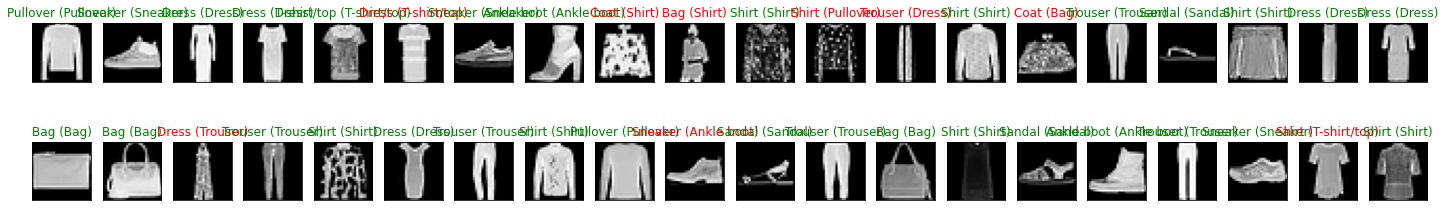

In [27]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
# get predictions
preds = np.squeeze(net(Variable(images, volatile=True)).data.max(1, keepdim=True)[1].numpy())
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx] else "red"))